In [1]:
# Import libraries
import sqlite3
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import db_queries
#print(db_queries.get_ref_id('Mario Yamasaki'))

# connect to database
import os
# get filepath to database
parent_dir = os.path.dirname(os.getcwd())
db_filepath = parent_dir + r'\ufc_db.db'
# connect to database (not needed for now)
db_connection = sqlite3.connect(db_filepath)
cursor = db_connection.cursor()

In [2]:
# get all fights (id, date, win method, weightclasses)
query = "SELECT events.date, fights.id, win_method, weightclass FROM events JOIN fights ON events.id = fights.event_id;"
list_of_fights = cursor.execute(query).fetchall()
print(len(list_of_fights))

'''
for i, fight in enumerate(list_of_fights):
  print(fight)
  if (i == 3):
    break
'''

6631


'\nfor i, fight in enumerate(list_of_fights):\n  print(fight)\n  if (i == 3):\n    break\n'

In [3]:
# list of weightclasses (sorted)
wcs = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 'Middleweight',
'LightHeavyweight', 'Heavyweight', 'W Strawweight', 'W Flyweight', 'W Bantamweight', 'W Featherweight', 'CatchWeight']

In [4]:
# make a list of all years (sorted)
years_list = []

for fight in list_of_fights:
  # get year of fight
  year = int(fight[0].split('/')[2])
  if year not in years_list:
    years_list.append(year)

years_list.sort()

#print(years_list)

In [5]:
# make a dict of all years (turn it into a function that returns a copy when called)
years_dict = dict()
for fight in list_of_fights:
  # get year of fight
  year = fight[0].split('/')[2]
  if year not in years_dict.keys():
    # make a dictionary
    years_dict[int(year)] = 0

def years_dict_copy():
  return copy.deepcopy(years_dict)

#print(years_dict)


In [6]:
# make a dictionary of all weightclasses (to store number of them)
weightclasses_data = []

for weight in wcs:
  # make a dict
  weight_dict = dict()
  weight_dict['weightclass'] = weight
  weight_dict['total fights'] = 0
  weight_dict['num fights by year'] = years_dict_copy()
  weightclasses_data.append(weight_dict)

# print check
#for weight in weightclasses_data:
#  print(weight)
#  print()


In [7]:
# add all data to weightclasses_data

# for each fight...
for fight in list_of_fights:
  # get weightclass of fight & year of fight
  weight = fight[3]
  year = int(fight[0].split('/')[2])
  
  # get index correponding to weightclass
  index = None
  
  for i, wt_dict in enumerate(weightclasses_data):
    if (wt_dict['weightclass'] == weight):
      index = i
      break
  
  # iterate into that index. Add 1 to total. Add 1 to year
  weightclasses_data[index]['total fights'] += 1
  weightclasses_data[index]['num fights by year'][year] += 1
  

# print check
'''
for weight in weightclasses_data:
  print(weight)
  print()
'''

'\nfor weight in weightclasses_data:\n  print(weight)\n  print()\n'

### PLOT BAR CHART -- NUM OF FIGHTS BY WEIGHTCLASS

In [8]:
x_axis_weightclass = ['Fly', 'Ban', 'Ftr', 'Lig', 'Wel', 'Mid', 'LHW', 'HW', 'W Str', 'W Fly', 'W Ban', 'W Ftr', 'CatchW']
#x_axis_weightclass = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 'Middleweight',
#'LightHeavyweight', 'Heavyweight', 'W Strawweight', 'W Flyweight', 'W Bantamweight', 'W Featherweight', 'CatchWeight']

In [9]:
y_axis_total_fights = []
# loop through to get total fights
for i, weight in enumerate(x_axis_weightclass):
  y_axis_total_fights.append(weightclasses_data[i]['total fights'])

#print(y_axis_total_fights)

[275, 577, 646, 1175, 1176, 887, 628, 585, 248, 179, 177, 25, 53]


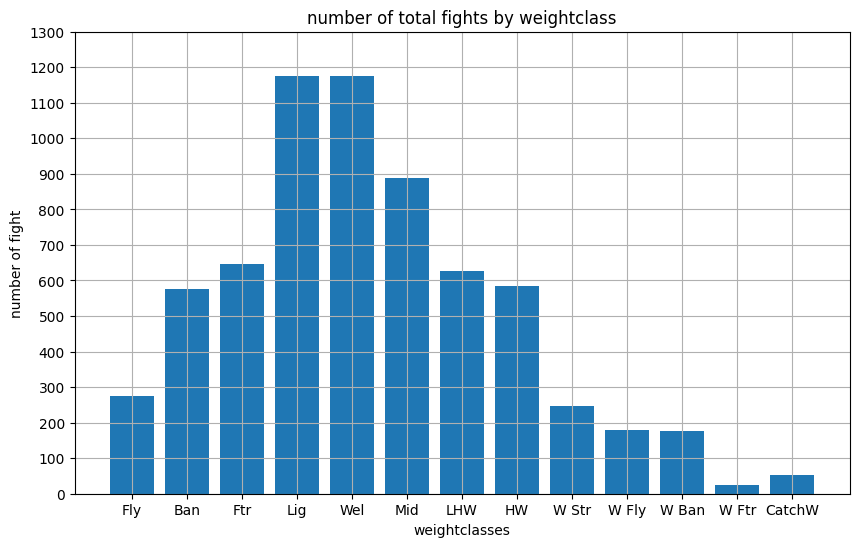

In [10]:
# plot bar chart
plt.figure(figsize = (10, 6))

plt.bar(x_axis_weightclass, y_axis_total_fights, align='center')
plt.xlabel('weightclasses')
plt.ylabel('number of fight')
plt.title('number of total fights by weightclass')
plt.grid(True)

y_axis_ticks = [0, 1300]
plt.yticks(np.arange(min(y_axis_ticks), max(y_axis_ticks)+1, 100))
plt.show()

### PLOT LINE CHART -- NUM OF FIGHTS FOR WEIGHTCLASS OVER TIME

In [11]:
# SET ALL X AND Y AXIS DATA

# Set x axis (years)
x_axis_years = [x for x in years_dict_copy()]
x_axis_years.sort()

# set all y axis
y_axis_fly, y_axis_ban, y_axis_ftr, y_axis_lig, y_axis_wel, y_axis_mid, y_axis_lhw, y_axis_hw, y_axis_W_str, y_axis_W_fly, y_axis_W_ban, y_axis_W_ftr, y_axis_catch = ([] for i in range(len(x_axis_weightclass)))

list_of_y_axis_data = [y_axis_fly, y_axis_ban, y_axis_ftr, y_axis_lig, y_axis_wel, y_axis_mid, y_axis_lhw, y_axis_hw, y_axis_W_str, y_axis_W_fly, y_axis_W_ban, y_axis_W_ftr, y_axis_catch]


# loop through each weightclass (use enumerate to match with list)
for i, weight in enumerate(weightclasses_data):
  
  # for each year
  for year in x_axis_years:
    # navigate to list of y_axis_data... then append the number of fights for that weightclass for that year
    list_of_y_axis_data[i].append(weight['num fights by year'][year])

# print check
'''
for item in list_of_y_axis_data:
  print(item)
'''


'\nfor item in list_of_y_axis_data:\n  print(item)\n'

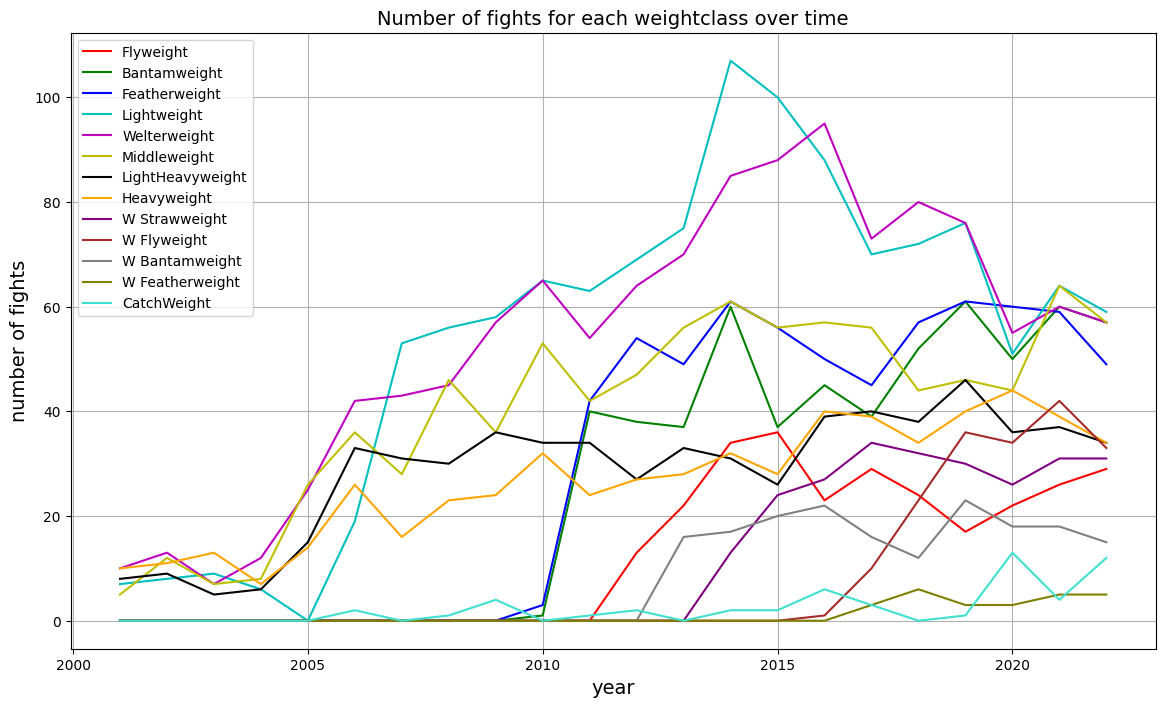

In [12]:
# plot num of fights in weightclass over time


colours = ['r','g','b','c','m','y','k','orange','purple','brown','gray','olive','turquoise','pink']
fig = plt.figure(figsize = (14, 8))

# make a plot for each line
for i, weightclass in enumerate(list_of_y_axis_data):
  plt.plot(x_axis_years, weightclass, color=colours[i], label = wcs[i])

plt.title('Number of fights for each weightclass over time', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('number of fights', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

